In [23]:
import pandas as pd


In [24]:
raw_df = pd.read_csv('../data/raw_data/recomendation_clasification.csv')

<Axes: xlabel='recomen_cat'>

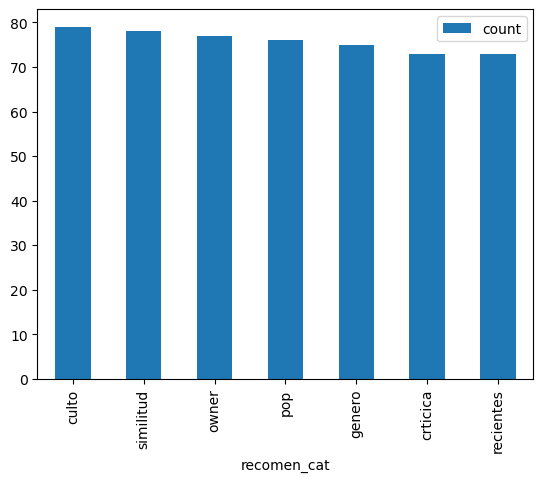

In [25]:
#wath if we've got balanced data...

raw_df['recomen_cat'].value_counts().plot(kind='bar',legend=True)

# Bowler model

In [26]:
# lets create bowler for our data text..
#Note: wont delete stops words.
from chat.modules.text_2_bow_stopsTrue import generate_bowler, generate_df

bowler_generated = generate_bowler(raw_df['text'])
bowler_generated.show_full_data #we see full data text
bowler_generated.vocabulary_

ModuleNotFoundError: No module named 'chat'

# Matrices for model

In [ ]:
# generate X data for modeling 
generated_df = generate_df(bowler_model=bowler_generated,text=raw_df['text'])
generated_df

,original text,text_clean,tokens,lemms,matrices
0,las mas buscadas,las mas buscadas,"[las, mas, buscadas]","[las, mas, busc]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,las mas rateadas,las mas rateadas,"[las, mas, rateadas]","[las, mas, rat]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,mejor rating,mejor rating,"[mejor, rating]","[mejor, rating]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,mejor critica,mejor critica,"[mejor, critica]","[mejor, critic]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,mas valoradas,mas valoradas,"[mas, valoradas]","[mas, valor]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
526,¿Qué películas podrías sugerirme basadas en mi...,que peliculas podrias sugerirme basadas en mis...,"[que, peliculas, podrias, sugerirme, basadas, ...","[que, pelicul, podri, suger, bas, en, mis, pre...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
527,Estoy buscando algo que esté en línea con mis ...,estoy buscando algo que este en linea con mis ...,"[estoy, buscando, algo, que, este, en, linea, ...","[estoy, busc, algo, que, este, en, line, con, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
528,¿Tienes alguna sugerencia que se ajuste a mi h...,tienes alguna sugerencia que se ajuste a mi hi...,"[tienes, alguna, sugerencia, que, se, ajuste, ...","[tien, algun, sugerent, que, se, ajust, a, mi,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ..."
529,¿Qué películas recomendarías basándote en mis ...,que peliculas recomendarias basandote en mis p...,"[que, peliculas, recomendarias, basandote, en,...","[que, pelicul, recomendari, basandot, en, mis,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
raw_df

,text,recomen_cat,target
0,las mas buscadas,crticica,0.0
1,las mas rateadas,crticica,0.0
2,mejor rating,crticica,0.0
3,mejor critica,crticica,0.0
4,mas valoradas,crticica,0.0
...,...,...,...
526,¿Qué películas podrías sugerirme basadas en mi...,similitud,6.0
527,Estoy buscando algo que esté en línea con mis ...,similitud,6.0
528,¿Tienes alguna sugerencia que se ajuste a mi h...,similitud,6.0
529,¿Qué películas recomendarías basándote en mis ...,similitud,6.0


# Proccesed df

In [ ]:
proccesed_df = raw_df
proccesed_df['matrixs'] = generated_df['matrices']
proccesed_df

,text,recomen_cat,target,matrixs
0,las mas buscadas,crticica,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,las mas rateadas,crticica,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,mejor rating,crticica,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,mejor critica,crticica,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,mas valoradas,crticica,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
526,¿Qué películas podrías sugerirme basadas en mi...,similitud,6.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
527,Estoy buscando algo que esté en línea con mis ...,similitud,6.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
528,¿Tienes alguna sugerencia que se ajuste a mi h...,similitud,6.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ..."
529,¿Qué películas recomendarías basándote en mis ...,similitud,6.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Datasets

In [ ]:
data_x = proccesed_df['matrixs'].tolist()
data_y = proccesed_df['target']

In [ ]:
#show data shapes
print('shape of data x: {} shape of data y: {}'.format((len(data_x), len(data_x[0])), data_y.shape))

shape of data x: (531, 512) shape of data y: (531,)


# Splits

In [ ]:
#split of data sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)
print('Shapes x: x train {} x test {}\nShapes y: y train {} y test {}'.format((len(x_train),len(x_train[0])),(len(x_test),len(x_test[0])),y_train.shape,y_test.shape))

Shapes x: x train (371, 512) x test (160, 512)
Shapes y: y train (371,) y test (160,)


# Create and fit Model

In [ ]:
#create model clasificador Logistic Regression Multinomial
from sklearn.linear_model import LogisticRegression
clasificador_model = LogisticRegression(solver='sag', multi_class='multinomial')
clasificador_model.fit(x_train,y_train)

/home/ackerman/anaconda3/envs/chatbot_nltk/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

# Metrics of model

In [ ]:
#metricas for model
from sklearn.metrics import confusion_matrix, accuracy_score
predictions = clasificador_model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[15  1  0  0 10  0  0]
 [ 1 11  0  0  2  0  0]
 [ 0  2 20  0  2  0  0]
 [ 0  2  0 23  4  0  1]
 [ 0  0  0  0 17  0  0]
 [ 0  0  0  0  1 21  4]
 [ 0  1  0  1  2  0 19]]
0.7875


# Predictions

In [ ]:
def test_model(mod_clasificador, mod_bowler):
    continuar = True
    print('escribe salir o exit para terminar la conversacion')
    while continuar == True:
        continuar = get_prediction(mod_clasificador,mod_bowler) == True

      
def get_prediction(mod_clasificador,mod_bowler):
    from chat.modules.text_2_bow_stopsTrue import text_to_matrix
    texto = input('')
    if (texto.lower() == 'salir') or (texto.lower() == 'exit'):
        return False
    else:
        texto_coded = text_to_matrix(mod_bowler,texto)
        prediction = mod_clasificador.predict(texto_coded.reshape(1, -1)) 
        prediction_probs = mod_clasificador.predict_proba(texto_coded.reshape(1, -1))
        print('\ntu texto: {}'.format(texto.lower()))
        print(f'critica: {round(prediction_probs[0][0]*100,2)}%, pop: {round(prediction_probs[0][1]*100,2)}%, recientes: {round(prediction_probs[0][2]*100,2)}%, culto: {round(prediction_probs[0][3]*100,2)}%, genero: {round(prediction_probs[0][4]*100,2)}%, owner: {round(prediction_probs[0][5]*100,2)}%, similitud: {round(prediction_probs[0][6]*100,2)}%')
        if prediction == 0:
            print('prediccion: critica')
        elif prediction == 1:
            print('prediccion: pop')
        elif prediction == 2:
            print('prediccion: recientes')
        elif prediction == 3:
            print('prediccion: culto')
        elif prediction == 4:
            print('prediccion: genero')
        elif prediction == 5:
            print('prediccion: owner')
        elif prediction == 6:
            print('prediccion: similitud')
        else: 
            print('No match')

        return True

In [ ]:
proccesed_df['recomen_cat'].unique()

array(['crticica', 'pop', 'recientes', 'culto', 'genero', 'owner',
       'similitud'], dtype=object)

In [ ]:
test_model(mod_clasificador=clasificador_model,mod_bowler=bowler_generated)

escribe salir o exit para terminar la conversacion

tu texto: hola quiero ver un drama
critica: 3.12%, pop: 22.31%, recientes: 7.74%, culto: 1.11%, genero: 53.98%, owner: 10.36%, similitud: 1.38%
prediccion: genero


In [ ]:
import joblib
joblib.dump(clasificador_model, '../models/recomendation_clasificator.joblib')

['../models/recomendation_clasificator.joblib']

In [28]:
proccesed_df.to_csv('../data/proccesed_data/recomen_clasification.csv',index=False)